!pip install -u tensorflow

In [ ]:
from sklearn.datasets import load_boston
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
import matplotlib.pyplot as plt 

In [ ]:
data = load_boston(return_X_y=False)

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = data.data # Independent Variables

In [ ]:
y = data.target # Target Variable

In [ ]:
X.shape 

(506, 13)

In [ ]:
y.shape # Target Varial

(506,)

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(339, 13)

In [ ]:
X_test.shape

(167, 13)

### Model Building with Tensorflow

1. Model Initialization  - Defining the architecture of the DL model
2. Model Compilation - Define the loss function, optimization functions
3. Model Training - # Epochs, etc.

In [ ]:
339/32

10.59375

In [ ]:
#Model Init
model = Sequential() # Blank Model
model.add(Input(shape = (13))) # Input Layer
model.add(Dense(units = 5, activation='relu')) #hidden Layer with relu activation
model.add(Dense(units = 1)) #Output Layer

In [ ]:
#Model Compilation
model.compile(optimizer = Adam(learning_rate=0.01),
              loss="mean_squared_error", 
              metrics="mean_absolute_error")

In [ ]:
# Model fit
history = model.fit(x=X_train, y= y_train, epochs=75 , batch_size = 32,validation_data= (X_test,y_test))

Epoch 1/75
11/11 [==============================] - 0s 14ms/step - loss: 279.7037 - mean_absolute_error: 13.1830 - val_loss: 82.9260 - val_mean_absolute_error: 7.3200
Epoch 2/75
11/11 [==============================] - 0s 2ms/step - loss: 87.4848 - mean_absolute_error: 6.8238 - val_loss: 52.2440 - val_mean_absolute_error: 5.2676
Epoch 3/75
11/11 [==============================] - 0s 3ms/step - loss: 74.5849 - mean_absolute_error: 6.5436 - val_loss: 54.4156 - val_mean_absolute_error: 4.7899
Epoch 4/75
11/11 [==============================] - 0s 3ms/step - loss: 73.7179 - mean_absolute_error: 5.9237 - val_loss: 75.8326 - val_mean_absolute_error: 7.4338
Epoch 5/75
11/11 [==============================] - 0s 3ms/step - loss: 71.8266 - mean_absolute_error: 6.1910 - val_loss: 49.2293 - val_mean_absolute_error: 5.0746
Epoch 6/75
11/11 [==============================] - 0s 4ms/step - loss: 64.8668 - mean_absolute_error: 6.0417 - val_loss: 49.0345 - val_mean_absolute_error: 4.6844
Epoch 7/75
11

Epoch 51/75
11/11 [==============================] - 0s 3ms/step - loss: 38.9676 - mean_absolute_error: 4.4512 - val_loss: 32.8112 - val_mean_absolute_error: 4.6706
Epoch 52/75
11/11 [==============================] - 0s 3ms/step - loss: 36.6244 - mean_absolute_error: 4.2813 - val_loss: 33.5967 - val_mean_absolute_error: 4.7318
Epoch 53/75
11/11 [==============================] - 0s 3ms/step - loss: 39.0273 - mean_absolute_error: 4.4741 - val_loss: 27.9639 - val_mean_absolute_error: 4.0100
Epoch 54/75
11/11 [==============================] - 0s 3ms/step - loss: 38.8567 - mean_absolute_error: 4.5337 - val_loss: 28.9041 - val_mean_absolute_error: 3.7767
Epoch 55/75
11/11 [==============================] - 0s 3ms/step - loss: 36.9947 - mean_absolute_error: 4.3071 - val_loss: 27.4977 - val_mean_absolute_error: 3.8114
Epoch 56/75
11/11 [==============================] - 0s 2ms/step - loss: 35.1184 - mean_absolute_error: 4.3385 - val_loss: 28.1875 - val_mean_absolute_error: 3.9432
Epoch 57/7

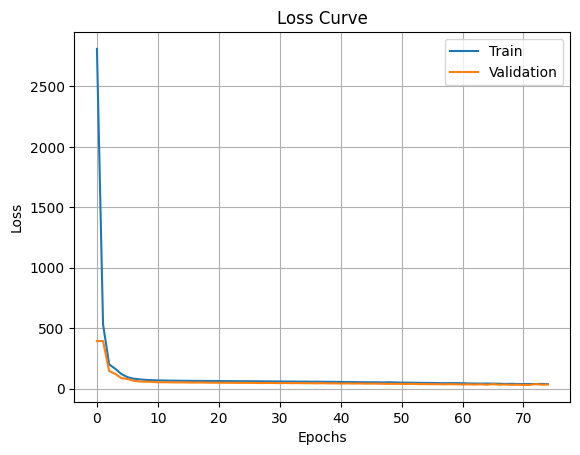

In [ ]:
# Loss curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.grid()
plt.show()

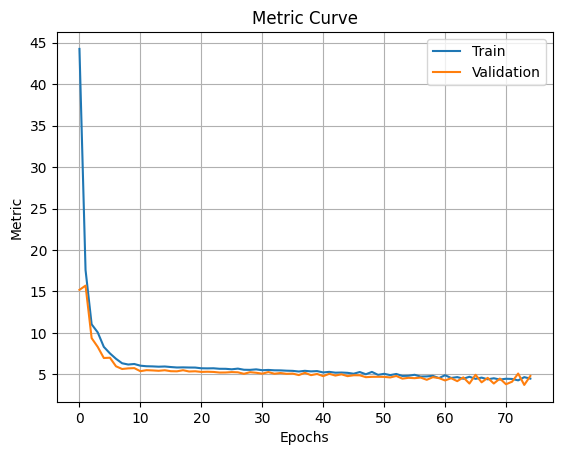

In [ ]:
# Metric curve
train_metric = history.history['mean_absolute_error']
val_metric = history.history['val_mean_absolute_error']

plt.plot(train_metric)
plt.plot(val_metric)
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.title("Metric Curve")
plt.grid()
plt.show()